In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from utils import *

In [2]:
# prepare data
x0_f = "./data/linear_vectorfield_data_x0.txt"
x1_f = "./data/linear_vectorfield_data_x1.txt"
x0 = pd.read_csv(x0_f, header=None, delimiter=" ").values
x1 = pd.read_csv(x1_f, header=None, delimiter=" ").values

del_t = 0.1
vec = (x1 - x0) / del_t

## Part One & Two

In [7]:
Linear = LinearApprox()
v_hat = Linear.linear_approx(x0, vec)
x1_hat = v_hat * del_t + x0
mse = np.square(x1 - x1_hat).sum()
print("Mean Squared Error: ", mse)


Nonlinear = NonlinearApprox(10, 1)
v_hat = Nonlinear.radial_approx(x0, vec)
x1_hat = v_hat * del_t + x0
mse = np.square(x1 - x1_hat).sum()
print("Mean Squared Error: ", mse)

Mean Squared Error:  1.0532185339804091e-13
Mean Squared Error:  0.1178744875760428


## Part Three

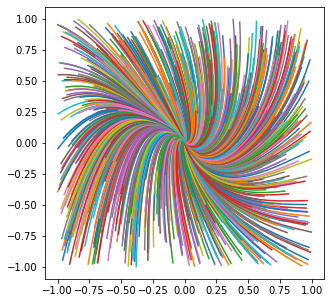

In [15]:
T = 100
x_hat_pred = [x0]

for _ in np.arange(T, step=del_t):
    v_hat = Nonlinear.predict(x_hat_pred[-1])
    x_hat = v_hat * del_t + x_hat_pred[-1]
    x_hat_pred.append(x_hat)

x_hat_pred = np.dstack(x_hat_pred)

plt.figure(figsize=(5, 5))
for i in range(x_hat_pred.shape[0]):
    plt.plot(x_hat_pred[i, 0, :], x_hat_pred[i, 1, :])
plt.show()

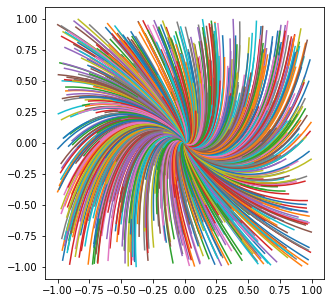

In [16]:
T = 100
x_hat_pred = [x0]

for _ in np.arange(T, step=del_t):
    v_hat = Linear.predict(x_hat_pred[-1])
    x_hat = v_hat * del_t + x_hat_pred[-1]
    x_hat_pred.append(x_hat)

x_hat_pred = np.dstack(x_hat_pred)

plt.figure(figsize=(5, 5))
for i in range(x_hat_pred.shape[0]):
    plt.plot(x_hat_pred[i, 0, :], x_hat_pred[i, 1, :])
plt.show()